<a href="https://colab.research.google.com/github/S3688570/Cars_Deep_Learning/blob/master/cars_dl_15092019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Access to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
!ls "/content/drive/My Drive/"

'Colab Notebooks'  'Getting started.pdf'


Hyperparameters

In [0]:
optimizer = "adam" #@param ["adam", "SGD", "adamax"]
epochs = 100 #@param {type:"number"}
batch_size = 16 #@param {type:"integer"}
img_width = 64 #@param {type:"integer"}
img_height = 64 #@param {type:"integer"}

Install Keras

In [5]:
!pip install keras

Load modules

In [6]:
import datetime
from time import time
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Activation
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback, TensorBoard
from keras.utils import to_categorical
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import confusion_matrix
import glob
import cv2
import seaborn as sns
import tensorflow as tf
from sklearn.utils import shuffle           # shuffle the data
import numpy as np                          # linear algebra
import pandas as pd                         # data processing, CSV file I/O (e.g. pd.read_csv)

Using TensorFlow backend.


In [0]:
start_time = datetime.datetime.now()

Total images in training, validation and test folders

In [8]:
trainingCarImages = os.listdir('/content/drive/My Drive/Colab Notebooks/cars_dl/cars/training_set/car/')
print ("Number of Training car images - ",str(len(trainingCarImages)))

trainingCrashImages = os.listdir('/content/drive/My Drive/Colab Notebooks/cars_dl/cars/training_set/crash/')
print ("Number of Training crash images - ",str(len(trainingCrashImages)))

testTestImages = os.listdir('/content/drive/My Drive/Colab Notebooks/cars_dl/cars/test_set/test/')
print ("Number of Test images - ",str(len(testTestImages)))

# testCrashImages = os.listdir('/content/drive/My Drive/Colab Notebooks/cars_dl/cars/test_set/crash/')
# print ("Number of Test crash images - ",str(len(testCrashImages)))

validCarImages = os.listdir('/content/drive/My Drive/Colab Notebooks/cars_dl/cars/val_set/car/')
print ("Number of Validation car images - ",str(len(validCarImages)))

validCrashImages = os.listdir('/content/drive/My Drive/Colab Notebooks/cars_dl/cars/val_set/crash/')
print ("Number of Validation crash images - ",str(len(validCrashImages)))

Number of Training car images -  1244
Number of Training crash images -  1244
Number of Test images -  260
Number of Validation car images -  576
Number of Validation crash images -  573


Examine image from each folder

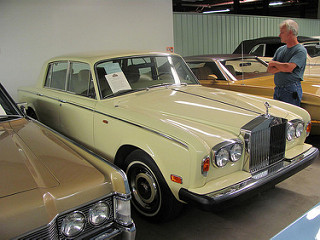

In [9]:
trainFilename = '/content/drive/My Drive/Colab Notebooks/cars_dl/cars/training_set/car/'+trainingCarImages[2]
dimage = Image.open(trainFilename)
dimage

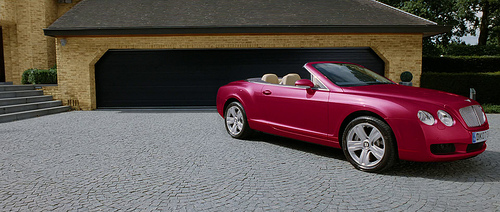

In [10]:
validFilename = '/content/drive/My Drive/Colab Notebooks/cars_dl/cars/val_set/car/'+validCarImages[5]
dimage = Image.open(validFilename)
dimage

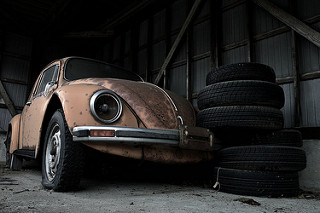

In [11]:
testFilename = '/content/drive/My Drive/Colab Notebooks/cars_dl/cars/test_set/test/'+ testTestImages[30]
dimage = Image.open(testFilename)
dimage

Convert to grey scale

(240, 320)


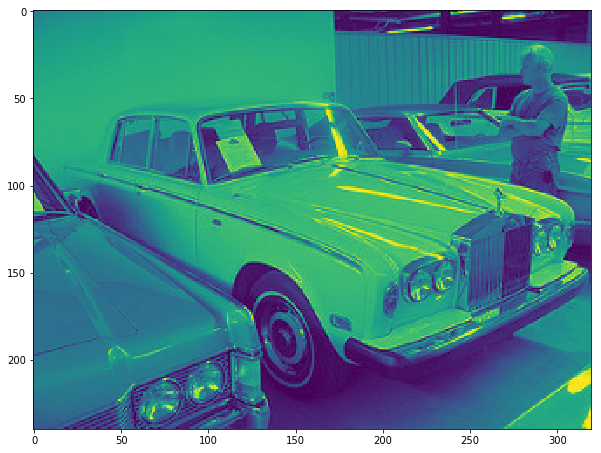

In [12]:
plt.figure(figsize=(10,10))
reqImage = cv2.imread(trainFilename, cv2.IMREAD_GRAYSCALE)
print (reqImage.shape)
plt.imshow(reqImage)

(212, 500, 3)
(212, 500)


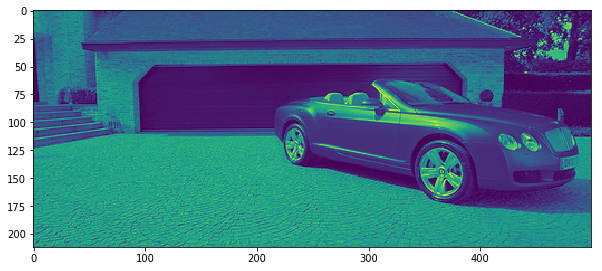

In [13]:
plt.figure(figsize=(10,10))

reqImage = cv2.imread(validFilename, cv2.IMREAD_COLOR)           # rgb
alpha_img = cv2.imread(validFilename, cv2.IMREAD_UNCHANGED) # rgba
gray_img = cv2.imread(validFilename, cv2.IMREAD_GRAYSCALE)  # grayscale
print (reqImage.shape)
print (gray_img.shape)
plt.imshow(gray_img)

(213, 320, 3)
(213, 320)


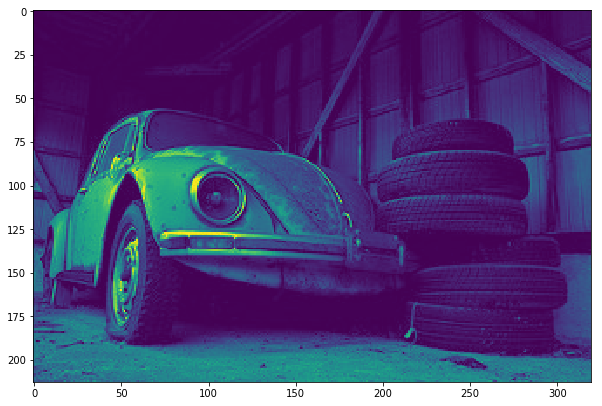

In [14]:
plt.figure(figsize=(10,10))

reqImage = cv2.imread(testFilename, cv2.IMREAD_COLOR)           # rgb
alpha_img = cv2.imread(testFilename, cv2.IMREAD_UNCHANGED) # rgba
gray_img = cv2.imread(testFilename, cv2.IMREAD_GRAYSCALE)  # grayscale
print (reqImage.shape)
print (gray_img.shape)
plt.imshow(gray_img)

In [15]:
train_data_dir = '/content/drive/My Drive/Colab Notebooks/cars_dl/cars/training_set/'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/cars_dl/cars/val_set/'
nb_train_samples = trainingCarImages + trainingCrashImages
nb_validation_samples = validCarImages + validCrashImages
nb_test_samples = testTestImages

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

print(input_shape)

(64, 64, 3)


Remove corrupted images

In [0]:
def my_gen(gen):
    while True:
        try:
            imgs, labels = next(gen)
            imgs /= 255
            yield imgs, labels
        except:
            pass

In [0]:
imgs, labels = next(valid_generator)

In [0]:
plots(imgs, titles = labels)

CNN model

Build CNN model

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(128, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(256, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(output_dim=2))
model.add(Activation('softmax'))







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=2)`


Compile CNN model

In [18]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.20,
    zoom_range=0.20,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
test_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
#    class_mode='binary',
    classes = ['car', 'crash'])

valid_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
#    class_mode='binary',
    classes = ['car', 'crash'])



# train_generator = train_datagen.flow_from_directory(
#     '/content/drive/My Drive/Colab Notebooks/cars_dl/cars/training_set/',
#     target_size=(64, 64),
#     classes = ['car', 'crash'],
#     color_mode="rgb",
#     interpolation='nearest',
#     batch_size=batch_size,
#     shuffle=True,
#     seed=42
# )

# valid_generator = test_datagen.flow_from_directory(
#     '/content/drive/My Drive/Colab Notebooks/cars_dl/cars/val_set/',
#     target_size=(64, 64),
#     classes = ['car', 'crash'],
#     color_mode="rgb",
#     batch_size=batch_size,
#     shuffle=True,
#     seed=42
# )

# test_generator = test_datagen.flow_from_directory(
#     '/content/drive/My Drive/Colab Notebooks/cars_dl/cars/test_set/',
#     target_size=(64, 64),
#     color_mode="rgb",
#     batch_size=1,
#     class_mode=None,
#     shuffle=False,
#     seed=42
# )

Found 2488 images belonging to 2 classes.
Found 1149 images belonging to 2 classes.


Print a set of images from each file

In [0]:
def plots(img, figsize=(12,6), rows = 1, titles = 1):
    if type(img[0]) is np.ndarray:
        img = np.array(img).astype(np.float_)
        if (img.shape[-1] != 3):
            img = img.transpose((0, 2, 3, 1))
    f =plt.figure(figsize = figsize)
    cols = 7//rows if (len(img) % 2 == 0) else len(img)//rows + 1
    for i in range(cols):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize = 10)
        plt.imshow(img[i], interpolation = None if np.interp else 'none')

Images from training set

In [0]:
imgs, labels = next(train_generator)

In [23]:
# Get image size
image_size = np.asarray([imgs.shape[1], imgs.shape[2], imgs.shape[3]])
print(image_size)

[64 64  3]


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


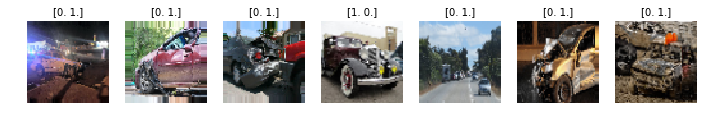

In [24]:
plots(imgs, titles = labels)

Images from validation set

In [0]:
imgs, labels = next(valid_generator)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


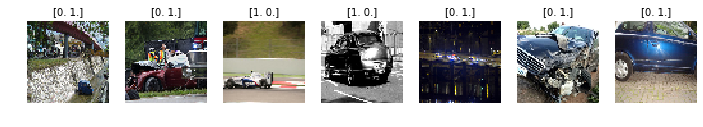

In [26]:
plots(imgs, titles = labels)

Train CNN model

In [27]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
history = model.fit_generator(generator = my_gen(train_generator), 
                              steps_per_epoch = STEP_SIZE_TRAIN, 
                              epochs = epochs, 
                              verbose = 2, 
                              validation_data = valid_generator, 
                              validation_steps = STEP_SIZE_VALID
                             )

# model.fit_generator(
#     train_generator,
#     steps_per_epoch=nb_train_samples // batch_size,
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


 - 1422s - loss: 0.6934 - acc: 0.4944 - val_loss: 0.6931 - val_acc: 0.5009
Epoch 2/100
 - 80s - loss: 0.6933 - acc: 0.4806 - val_loss: 0.6931 - val_acc: 0.4969
Epoch 3/100
 - 37s - loss: 0.6932 - acc: 0.4911 - val_loss: 0.6930 - val_acc: 0.5128
Epoch 4/100
 - 38s - loss: 0.6934 - acc: 0.4964 - val_loss: 0.6932 - val_acc: 0.5031
Epoch 5/100
 - 38s - loss: 0.6932 - acc: 0.4988 - val_loss: 0.6931 - val_acc: 0.5013
Epoch 6/100
 - 38s - loss: 0.6931 - acc: 0.5089 - val_loss: 0.6933 - val_acc: 0.4943
Epoch 7/100
 - 36s - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5013
Epoch 8/100
 - 39s - loss: 0.6932 - acc: 0.5064 - val_loss: 0.6932 - val_acc: 0.4996
Epoch 9/100
 - 39s - loss: 0.6932 - acc: 0.4940 - val_loss: 0.6933 - val_acc: 0.4987
Epoch 10/100
 - 37s - loss: 0.6933 - acc: 0.4911 - val_loss: 0.6931 - val_acc: 0.4987
Epoch 11/100
 - 38s - loss: 0.6932 - acc: 0.5040 - val_loss: 0.6933 - val_acc: 0.4978
Epoch 12/100
 - 37s - loss: 0.6934 - acc: 0.4774 - val_loss: 0.6932 - val

Exception ignored in: <generator object my_gen at 0x7f8911e7c2b0>
RuntimeError: generator ignored GeneratorExit


In [28]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [0]:
#summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

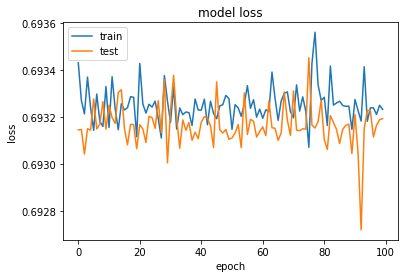

In [30]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
model.evaluate_generator(generator=valid_generator,
steps=STEP_SIZE_VALID)

[0.6931457015830027, 0.5008802816901409]

In [32]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

NameError: ignored

In [0]:
predicted_class_indices=np.argmax(pred,axis=1)

In [0]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [0]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

Is GPU running

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

Which GPU

In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

RAM info

In [0]:
!cat /proc/meminfo

CPU info

In [0]:
!cat /proc/cpuinfo